In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_iris

In [4]:
df = load_iris()

In [5]:
iris_data = pd.DataFrame(df.data)

In [7]:
iris_data.head(5)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_data.columns = df.feature_names

In [9]:
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
x_scale = scaler.fit_transform(iris_data)

In [13]:
x_scale.shape

(150, 4)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
X_new = pca.fit_transform(x_scale)

In [17]:
X_new

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

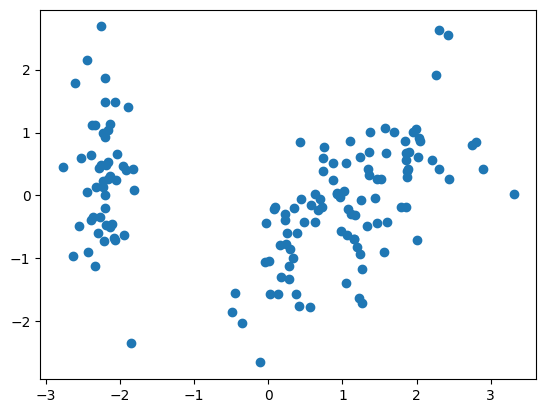

In [18]:
plt.scatter(X_new[:,0],X_new[:,1])

Text(0, 0.5, 'Euclidean distance')

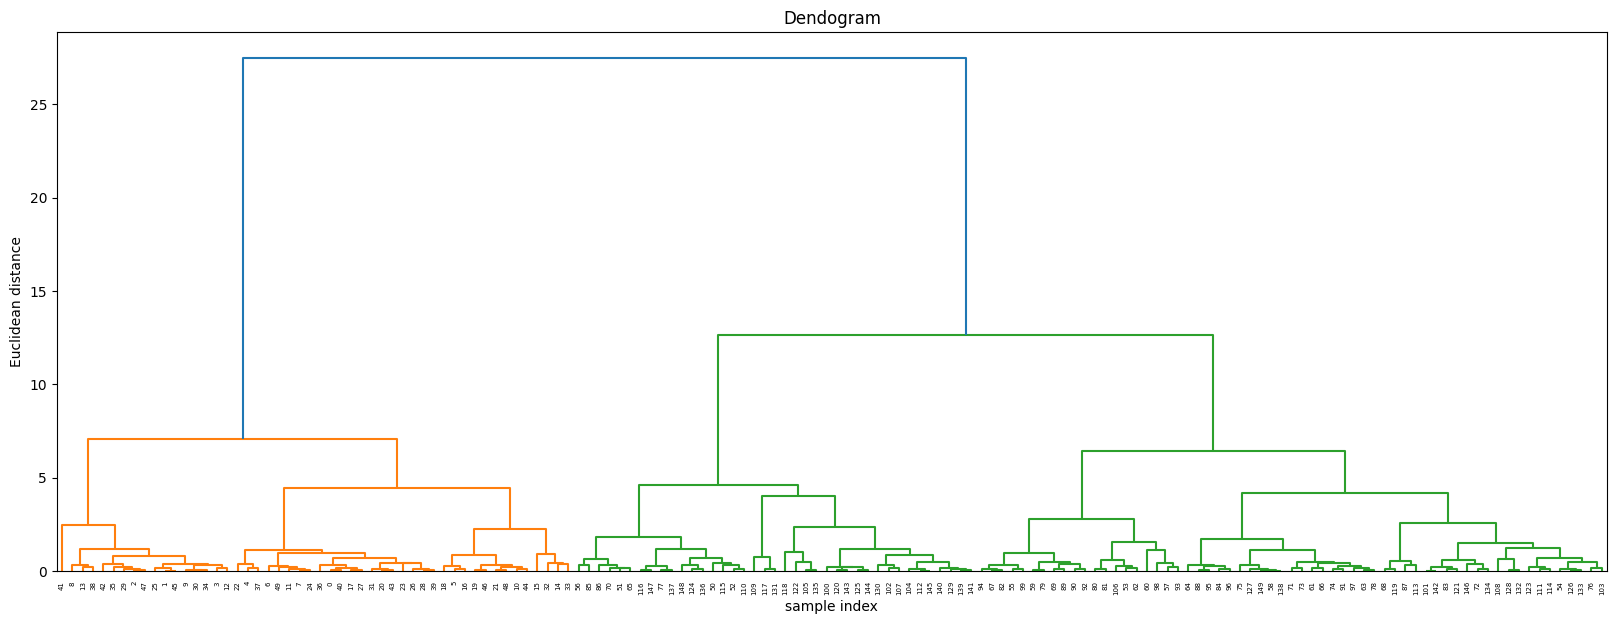

In [20]:
## now we have to create dendogram 
## for that we have to use scipy 

import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,7))
plt.title("Dendogram")

sc.dendrogram(sc.linkage(X_new,method="ward"))
plt.xlabel("sample index")
plt.ylabel("Euclidean distance")

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
aggo = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")

In [24]:
aggo

AgglomerativeClustering(affinity='euclidean')

In [25]:
aggo.fit(X_new)

C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [26]:
aggo.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

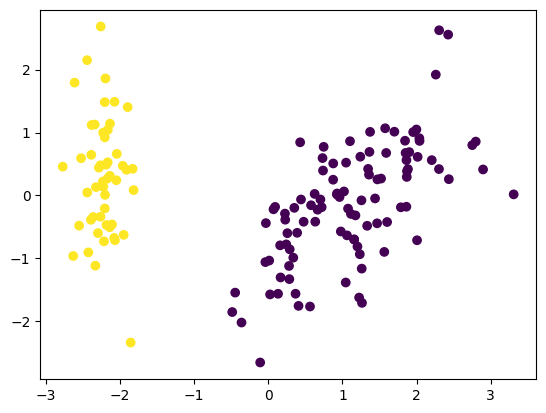

In [27]:
plt.scatter(X_new[:,0],X_new[:,1],c=aggo.labels_)

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_coeff = []

for i in range(2,11):
    aggo = AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage="ward")
    aggo.fit(X_new)
    silhouette_coeff.append(silhouette_score(X_new,aggo.labels_))
    

C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\dhruv\AppData\Local

In [32]:
silhouette_coeff

[0.6145202036230449,
 0.5110595988766189,
 0.4487350420958893,
 0.4041689631006268,
 0.36721128895830735,
 0.3706820678912667,
 0.3930552606912112,
 0.4183694466469873,
 0.40542056288894923]

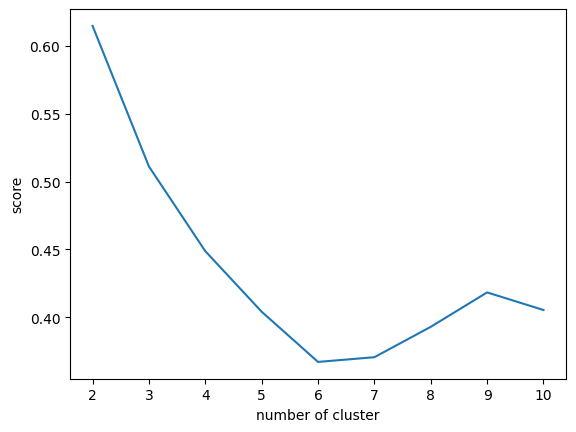

In [34]:
plt.plot(range(2,11),silhouette_coeff)
plt.xlabel("number of cluster")
plt.ylabel("score")
plt.show()